In [1]:
import pandas, numpy, seaborn, scipy

In [2]:
import sklearn, sklearn.preprocessing
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'axes.labelsize':20, 
                            'figure.figsize':(12 * 0.8, 9 * 0.8)})

In [4]:
input_data_file = '/Users/adrian/gd15/research/vigur/data/targeted.2024.eva/EC_72_EVA_All_ION_MODES.xlsx'

In [5]:
negativedf = pandas.read_excel(input_data_file, sheet_name='ACID_NEG', index_col='SAMPLE')

# batch & replicate 1

In [6]:
wdf = negativedf[negativedf['LCMS_BATCH'] == 1]

['Pool', 'Pool', 'Pool', 'Pool', 'Pool', 'Pool']
['Pool', 'Pool', 'Pool', 'Pool', 'Pool', 'Pool']


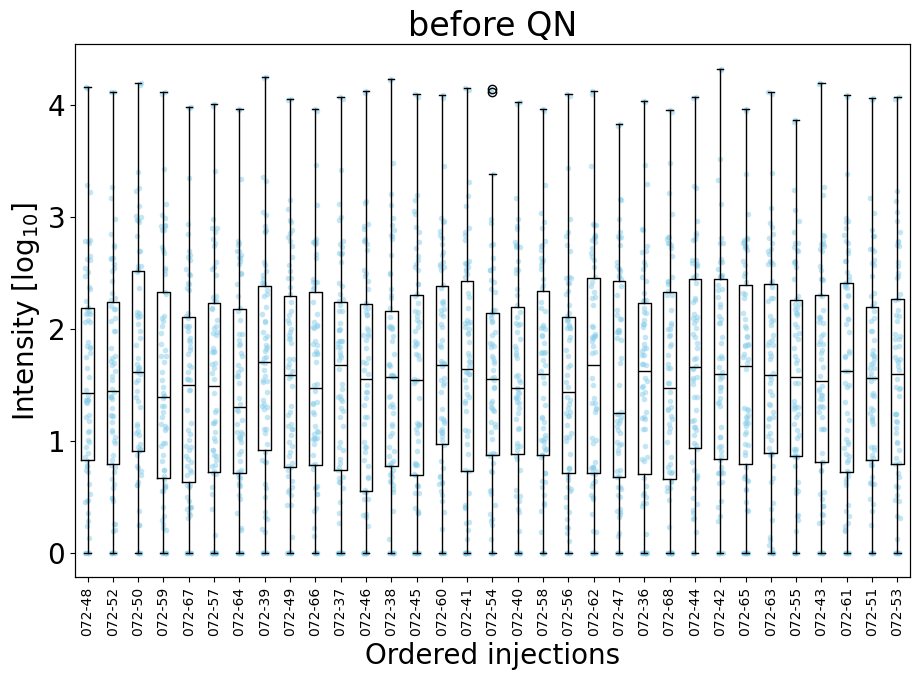

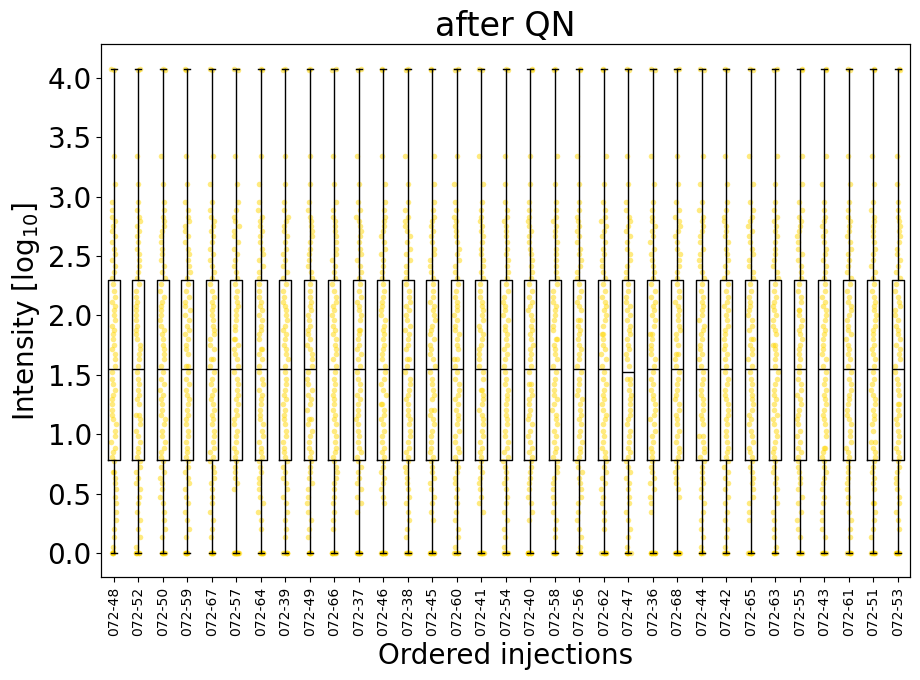

In [7]:
# transform
intensities = wdf.iloc[:, 6:]

rocks = []
for label in wdf.index:
    if isinstance(label, str) == False:
        rocks.append(label)
    else:
        if '072' not in label:
            rocks.append(label)  
print(rocks)
# some rocks that failed
print(rocks)
#
intensities.drop(rocks, axis=0, inplace=True)

intensities = intensities.transpose()
log10_intensities = numpy.log10(intensities + 1)

#plot
ax1 = log10_intensities.boxplot(color='black', grid=False)
ax2 = ax1.twiny()
seaborn.stripplot(log10_intensities, color='skyblue', size=4, alpha=1/2, ax=ax2)
ax2.xaxis.set_visible(False)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
ax1.tick_params(axis='x', labelrotation=90, labelsize=10)
ax1.set_xlabel('Ordered injections')
ax1.set_ylabel('Intensity [log$_{10}$]')
matplotlib.pyplot.title('before QN')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

###
### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
###

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(log10_intensities.values, axis=0), 
                             index=log10_intensities.index, 
                             columns=log10_intensities.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
df_qn = log10_intensities.rank(method="min").stack().astype(int).map(df_mean).unstack()

# plot after
ax1 = df_qn.boxplot(color='black', grid=False)
ax2 = ax1.twiny()
seaborn.stripplot(df_qn, color='gold', size=4, alpha=1/2, ax=ax2)
ax2.xaxis.set_visible(False)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
ax1.tick_params(axis='x', labelrotation=90, labelsize=10)
ax1.set_xlabel('Ordered injections')
ax1.set_ylabel('Intensity [log$_{10}$]')
matplotlib.pyplot.title('after QN')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

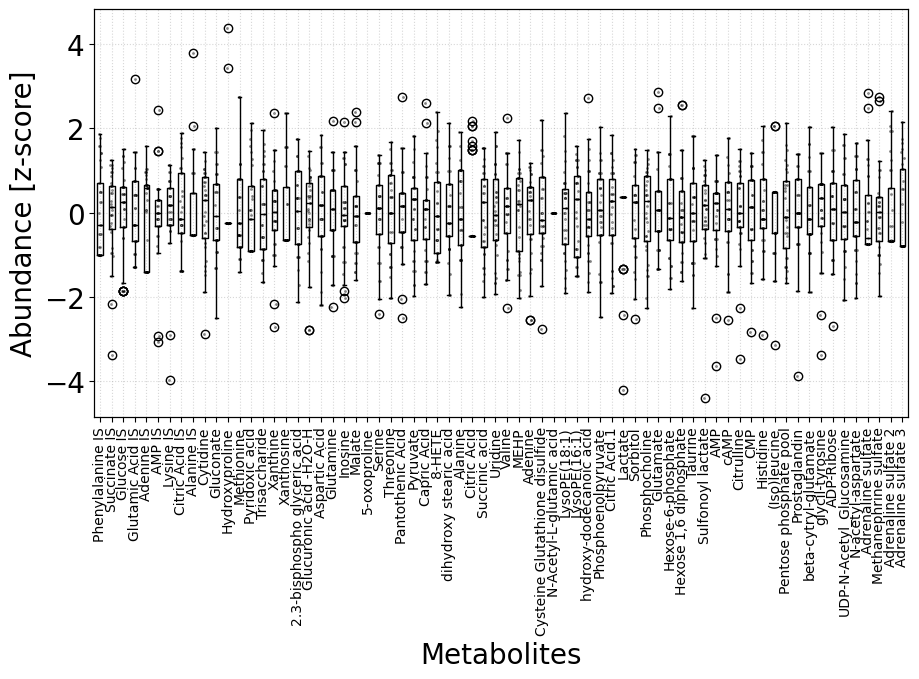

In [8]:
# transpose & scale
t_df_qn = df_qn.transpose()
std_scaler = sklearn.preprocessing.StandardScaler()
df_std = pandas.DataFrame(std_scaler.fit_transform(t_df_qn), columns=t_df_qn.columns, index=t_df_qn.index)

ax1 = df_std.boxplot(color='black', grid=False)
ax2 = ax1.twiny()
seaborn.stripplot(df_std, color='black', size=2, alpha=1/2, ax=ax2)
ax2.xaxis.set_visible(False)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
ax1.tick_params(axis='x', labelrotation=90, labelsize=10)
ax1.set_xlabel('Metabolites')
ax1.set_ylabel('Abundance [z-score]')
ax1.grid(True, ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [9]:
print(log10_intensities.loc['AMP IS'].values)
print(df_qn.loc['AMP IS'].values)

[2.79048854 2.84547757 2.97550258 2.88264291 2.69929387 2.55353108
 2.78517033 2.92279446 2.88355072 2.77207661 2.68365391 2.80694474
 2.66029331 2.91317943 2.68699714 2.84375399 1.87981815 2.74162662
 2.8982753  2.45269091 2.82561239 3.16144257 2.60137979 3.2132866
 2.84349813 2.19596604 2.79580427 2.6037353  2.59284601 2.74431255
 2.7716639  2.83280452 2.86400767]
[2.88927424 2.88927424 2.75109676 2.67241745 2.88927424 2.6204028
 3.1055621  2.82653537 2.82653537 2.75109676 2.71408659 2.79083523
 2.6204028  2.82653537 2.67241745 2.79083523 2.0075104  2.75109676
 2.88927424 2.67241745 2.75109676 3.33882073 2.71408659 3.1055621
 2.82653537 2.0425321  2.82653537 2.56179533 2.51929994 2.71408659
 2.71408659 2.88927424 2.82653537]


In [15]:
print(log10_intensities.loc['Lactate'].values)
print(df_qn.loc['Lactate'].values)

[3.28450134 3.16880645 3.23472325 3.43113465 3.3495223  3.41299095
 3.33706912 3.36199249 3.1482126  3.461122   3.41854754 3.14308822
 3.48588021 3.15170839 3.45280208 3.31056354 3.38133533 3.17291278
 3.28611793 3.439282   3.45377625 2.74763783 3.46349687 3.47989145
 3.28053558 3.52211545 3.38091893 3.39234639 3.24377498 3.27175567
 3.38680046 3.1694834  3.14539688]
[3.33882073 3.1055621  2.95794333 3.33882073 3.33882073 3.33882073
 3.33882073 3.33882073 3.33882073 3.33882073 3.33882073 3.33882073
 3.33882073 3.1055621  3.33882073 3.33882073 3.33882073 3.33882073
 3.33882073 3.33882073 3.33882073 2.71408659 3.33882073 3.33882073
 3.33882073 3.33882073 3.33882073 3.33882073 3.33882073 3.33882073
 3.33882073 3.33882073 3.1055621 ]


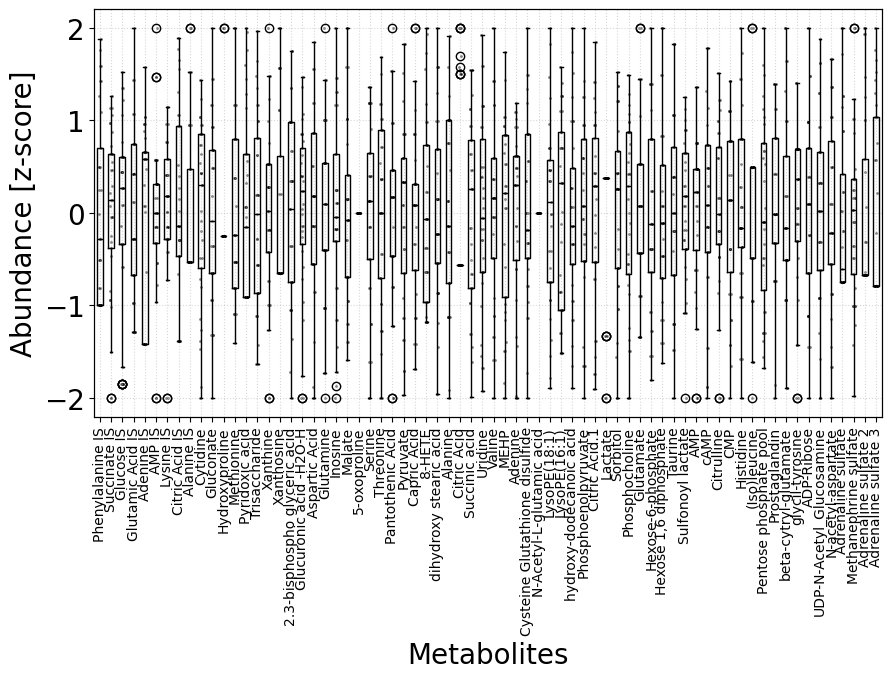

In [11]:
# clip
df_std.clip(-2, 2, inplace=True)

ax1 = df_std.boxplot(color='black', grid=False)
ax2 = ax1.twiny()
seaborn.stripplot(df_std, color='black', size=2, alpha=1/2, ax=ax2)
ax2.xaxis.set_visible(False)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)
ax1.tick_params(axis='x', labelrotation=90, labelsize=10)
ax1.set_xlabel('Metabolites')
ax1.set_ylabel('Abundance [z-score]')
ax1.grid(True, ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

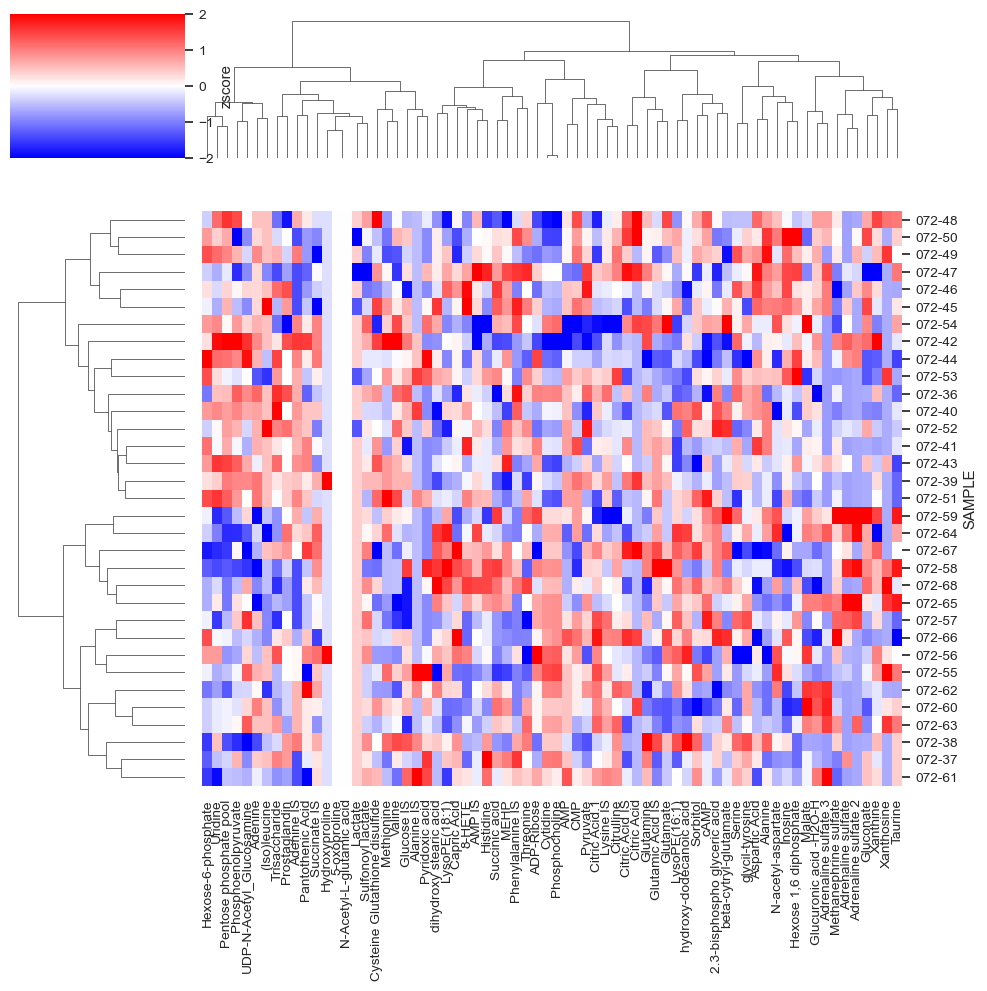

In [12]:
# visualize pattern
linkage_method = 'ward'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(df_std, 
                   cmap='bwr', col_cluster=True, vmin=-2, vmax=2, 
                   method=linkage_method, metric=distance_metric, 
                   yticklabels=1, xticklabels=1,
                   cbar_kws={'label':'zscore'})
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

seaborn.reset_orig()

In [13]:
print(df_std['Alanine IS'].mean())
print(df_std['Alanine IS'].std())

-0.05600778988100685
0.8343820939965679


Timepoint 4
	 Phenylalanine IS
	 Succinate IS
	 Glucose IS
	 Glutamic Acid IS
	 Adenine IS
	 AMP IS
	 Lysine IS
	 Citric Acid IS
	 Alanine IS
	 Cytidine
		 [-0.29423553 -0.19324442 -0.08379884] [-1.88535223 -1.47261822 -0.80076385] 0.020555152326749492
	 Gluconate
	 Hydroxyproline
	 Methionine
	 Pyridoxic acid
	 Trisaccharide
	 Xanthine
	 Xanthosine
	 2.3-bisphospho glyceric acid
	 Glucuronic acid -H2O-H
		 [-0.00970261  0.09815678  0.23636793] [0.77052891 0.40118274 0.62592566] 0.01896676630116325
	 Aspartic Acid
	 Glutamine
	 Inosine
	 Malate
	 5-oxoproline
	 Serine
	 Threonine
	 Pantothenic Acid
	 Pyruvate
	 Capric Acid
	 8-HETE
	 dihydroxy stearic acid
	 Alanine
	 Citric Acid
	 Succinic acid
	 Uridine
	 Valine
	 MEHP
	 Adenine
	 Cysteine Glutathione disulfide
	 N-Acetyl-L-glutamic acid
	 LysoPE(18:1)
	 LysoPE(16:1)
	 hydroxy-dodecanoic acid
	 Phosphoenolpyruvate
	 Citric Acid.1
		 [0.28915263 0.14467451 0.4329545 ] [-1.73940254 -0.52633497 -1.55849982] 0.015582508025990415
	 Lactat

/Users/adrian/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/Users/adrian/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/Users/adrian/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/Users/adrian/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531

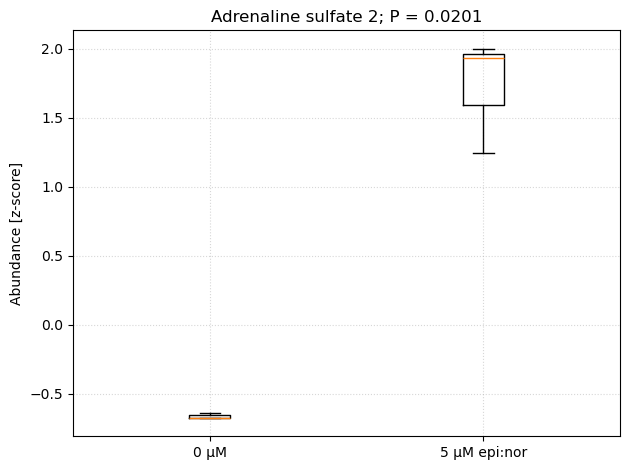

Adrenaline sulfate 3 0.0026115756202904424


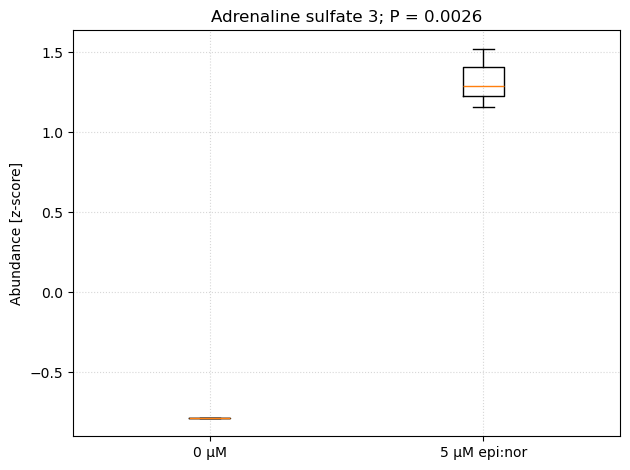

In [14]:
# test
timepoints = [4, 24]
timepoints = [4, 24]
control_label = '0µM'
sample_label = '5 µM epi:nor'
metabolites = df_std.columns

for timepoint in timepoints:
    print('Timepoint {}'.format(timepoint))
    rules = (wdf['TIME'] == timepoint) & (wdf['TREATMENT'] == control_label)
    controls = wdf[rules].index.to_list()
    rules = (wdf['TIME'] == timepoint) & (wdf['TREATMENT'] == sample_label)
    samples = wdf[rules].index.to_list()

    uncorrected = []
    for metabolite in metabolites:
        print('\t', metabolite)
        existing = [control for control in controls if control in df_std.index]
        x = df_std.loc[existing, metabolite]
        existing = [sample for sample in samples if sample in df_std.index]
        y = df_std.loc[samples, metabolite]

        (statistic, pvalue) = scipy.stats.ttest_ind(x, y)
        if numpy.isnan(pvalue) == True:
            pvalue = 1
        uncorrected.append(pvalue)
        if pvalue < 0.05:
            print('\t\t', x.values, y.values, pvalue)
    results = statsmodels.stats.multitest.multipletests(uncorrected, method='fdr_bh')
    print('We found significant metabolites:', sum(results[0]))
    print(results)

    # plot significant
    for i in range(len(metabolites)):
        if results[0][i] == True:
            print(metabolites[i], results[1][i])
            metabolite = metabolites[i]
            a = df_std.loc[controls, metabolite]
            b = df_std.loc[samples, metabolite]
            matplotlib.pyplot.boxplot([a, b])
            matplotlib.pyplot.title('{}; P = {:.4f}'.format(metabolite, results[1][i]))
            matplotlib.pyplot.xticks([1, 2], ['0 µM', '5 µM epi:nor'])
            matplotlib.pyplot.ylabel('Abundance [z-score]')
            matplotlib.pyplot.grid(ls=':', alpha=0.5)
            matplotlib.pyplot.tight_layout()
            matplotlib.pyplot.show()